In [58]:
import pandas as pd
import matplotlib
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder

low_memory = False

In [59]:
df_2014 = pd.read_csv('dados_congresso/ceapd_2014.csv', sep=';')
df_2015 = pd.read_csv('dados_congresso/ceapd_2015.csv', sep=';')
df_2016 = pd.read_csv('dados_congresso/ceapd_2016.csv', sep=';')
df_2017 = pd.read_csv('dados_congresso/ceapd_2017.csv', sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
dfs = [df_2014, df_2015, df_2016, df_2017]

In [61]:
df = pd.concat(dfs)

In [62]:
df.head()

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABELARDO CAMARINHA,141463.0,329.0,2011,SP,PSB,54.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,3,2014,0,NaN,NaN,1107916,4646.0,0.0,1772,5393987
1,ABELARDO CAMARINHA,141463.0,329.0,2011,SP,PSB,54.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,6,2014,0,NaN,NaN,1128219,4721.0,0.0,1772,5466596
2,ABELARDO CAMARINHA,141463.0,329.0,2011,SP,PSB,54.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,7,2014,0,NaN,NaN,1131441,4741.0,0.0,1772,5479339
3,ABELARDO CAMARINHA,141463.0,329.0,2011,SP,PSB,54.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2014,0,NaN,NaN,1122638,4703.0,0.0,1772,5446454
4,ABELARDO CAMARINHA,141463.0,329.0,2011,SP,PSB,54.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,1,2014,0,NaN,NaN,1090732,4561.0,0.0,1772,5335354


In [63]:
len(df)

1404379

In [64]:
df.columns

Index(['txNomeParlamentar', 'idecadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento'],
      dtype='object')

In [65]:
df = df.drop(['idecadastro', 'nuCarteiraParlamentar', 'txtDescricaoEspecificacao',
         'nuLegislatura', 'numSubCota', 'numEspecificacaoSubCota',
         'txtCNPJCPF', 'txtNumero', 'numLote','nuDeputadoId',
         'ideDocumento', 'numParcela', 'indTipoDocumento', 'numRessarcimento', 'codLegislatura',
              'datEmissao', 'vlrGlosa', 'vlrDocumento', 'vlrRestituicao', 'txtFornecedor'], axis=1)

# Limpeza dos dados

## Removendo os NANs:

In [66]:
print("Total Train Features with NaN Values = " + str(df.columns[df.isnull().sum() != 0].size))
if (df.columns[df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(df.columns[df.isnull().sum() != 0])))
    df[df.columns[df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 4
Features with NaN => ['sgUF', 'sgPartido', 'txtPassageiro', 'txtTrecho']


In [67]:
df_nan = (df.isnull().sum()).to_frame() 

In [68]:
df_nan.rename(columns={0:'qtd_nan'}, inplace=True) 

In [69]:
df_nan.sort_values('qtd_nan', ascending=False) 

,qtd_nan
txtPassageiro,962604
txtTrecho,955203
sgUF,3106
sgPartido,3106
txNomeParlamentar,0
txtDescricao,0
vlrLiquido,0
numMes,0
numAno,0


In [70]:
df = df[pd.notnull(df.sgUF)]

In [71]:
df_nan = (df.isnull().sum()).to_frame() 

In [72]:
df_nan.rename(columns={0:'qtd_nan'}, inplace=True) 

In [73]:
df_nan.sort_values('qtd_nan', ascending=False) 

,qtd_nan
txtPassageiro,959651
txtTrecho,952436
txNomeParlamentar,0
sgUF,0
sgPartido,0
txtDescricao,0
vlrLiquido,0
numMes,0
numAno,0


## Verificando valores Inválidos

In [74]:
df.sgUF.value_counts()

SP    222251
MG    174686
RJ    124242
RS    117515
BA    109958
PR    103366
PE     73806
SC     63570
CE     50085
PA     38854
MA     34411
GO     26167
PB     25315
ES     22383
AL     21207
PI     20886
RN     20725
MT     19778
MS     18163
RO     18075
AC     17288
SE     15283
TO     14963
RR     13429
AM     13063
AP     13042
DF      8762
Name: sgUF, dtype: int64

In [75]:
df.sgPartido.value_counts()

PT         199604
PP         147359
MDB        139749
PSDB       137279
DEM        103809
PR         101815
PSD         92182
PSB         69597
PDT         53596
PODE        39871
PCdoB       39774
PTB         38605
PRB         36898
SD          26295
PROS        26179
PPS         24077
PMDB        18259
PSC         17808
PV          16811
PSL         14580
PSOL        14423
PATRI       13291
AVANTE      12609
PHS          6349
REDE         4046
PMN          1692
PPL          1607
PRP           941
PTdoB         740
S.PART.       684
PEN           267
PRTB          253
PSDC          224
Name: sgPartido, dtype: int64

In [76]:
df.txtDescricao.value_counts()

Emissão Bilhete Aéreo                                           439963
COMBUSTÍVEIS E LUBRIFICANTES.                                   282887
TELEFONIA                                                       148333
SERVIÇOS POSTAIS                                                118738
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                       101192
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                      100738
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR        87943
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                             41195
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.           24356
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                    23187
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                    11080
PASSAGENS AÉREAS                                                  9000
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                       4179
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.          3594
ASSINA

In [77]:
df.dtypes

txNomeParlamentar    object
sgUF                 object
sgPartido            object
txtDescricao         object
vlrLiquido           object
numMes                int64
numAno                int64
txtPassageiro        object
txtTrecho            object
dtype: object

## Removendo os duplicados

In [78]:
len(df)

1401273

In [79]:
df = df.drop_duplicates()

In [80]:
len(df)

1188882

## Retirando passagens de Brasília

In [81]:
df_bilhete = df.loc[df['txtDescricao'] == 'Emissão Bilhete Aéreo']
df_bilhete = df_bilhete[pd.notnull(df_bilhete.txtTrecho)]
df_bilhete = df_bilhete[pd.notnull(df_bilhete.txtPassageiro)]
df_bilhete = df_bilhete[~df_bilhete.txtTrecho.str.contains('BSB')]

df_n_bilhete = df.loc[df['txtDescricao'] != 'Emissão Bilhete Aéreo']
df = pd.concat([df_bilhete, df_n_bilhete])

In [82]:
df_passagem = df.loc[df['txtDescricao'] == 'PASSAGENS AÉREAS']
df_passagem = df_passagem[pd.notnull(df_passagem.txtTrecho)]
df_passagem = df_passagem[pd.notnull(df_passagem.txtPassageiro)]

df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('brasília')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('Brasília')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('brasilia')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('Brasilia')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('BSB')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('bsb')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('BRASÍLIA')]
df_passagem = df_passagem[~df_passagem.txtTrecho.str.contains('BRASILIA')]

df_n_passagem = df.loc[df['txtDescricao'] != 'PASSAGENS AÉREAS']
df = pd.concat([df_passagem, df_n_passagem])

In [83]:
df = df.drop(['txtTrecho', 'txtPassageiro'], axis=1)

# Transformação dos dados

## Arrumando os tipos dos atributos

In [85]:
df = df[~df.vlrLiquido.str.contains('-')]
df['vlrLiquido'] = df.vlrLiquido.str.replace(',', '.')
# df['vlrGlosa'] = df.vlrGlosa.str.replace(',', '.')
# df['vlrDocumento'] = df.vlrDocumento.str.replace(',', '.')

In [86]:
df.dtypes

txNomeParlamentar    object
sgUF                 object
sgPartido            object
txtDescricao         object
vlrLiquido           object
numMes                int64
numAno                int64
dtype: object

In [87]:
df['vlrLiquido'] = df.vlrLiquido.astype(float)
# df['vlrGlosa'] = df.vlrGlosa.astype(float)
# df['vlrDocumento'] = df.vlrDocumento.astype(float)

In [88]:
df[df.vlrLiquido == 0]

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrLiquido,numMes,numAno


In [89]:
df.describe()

,vlrLiquido,numMes,numAno
count,833803.000000,833803.000000,833803.000000
mean,776.482939,6.464484,2015.485067
std,2720.396950,3.331621,1.104144
min,0.010000,1.000000,2014.000000
25%,51.970000,4.000000,2015.000000
50%,140.900000,6.000000,2015.000000
75%,368.160000,9.000000,2016.000000
max,208320.000000,12.000000,2017.000000


## Normalização

In [31]:
df_numeric = df.select_dtypes(include='float')
df['vlrLiquido'] = df_numeric.fillna(0).apply(minmax_scale)

## Histogramas e análises

In [32]:
df.describe()

,vlrLiquido,numMes,numAno
count,833803.000000,833803.000000,833803.000000
mean,0.003727,6.464484,2015.485067
std,0.013059,3.331621,1.104144
min,0.000000,1.000000,2014.000000
25%,0.000249,4.000000,2015.000000
50%,0.000676,6.000000,2015.000000
75%,0.001767,9.000000,2016.000000
max,1.000000,12.000000,2017.000000


### Quantidade de cada tipo de gasto

In [33]:
df.txtDescricao.value_counts().plot(kind='barh', figsize=(8,10))

### Quantidade de parlamentares por estado

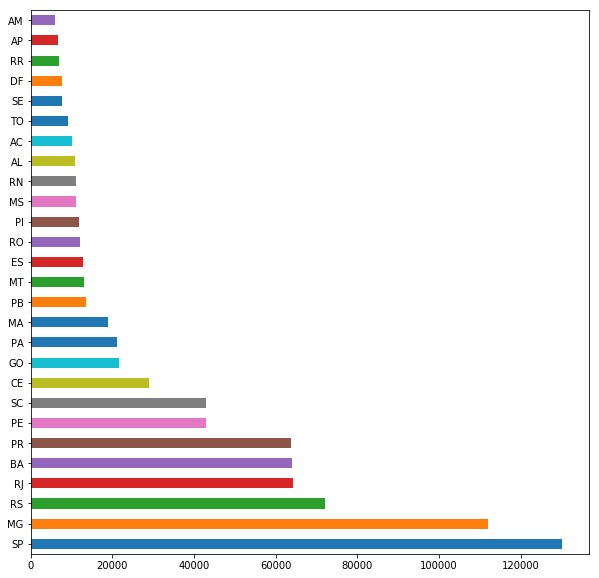

In [34]:
df.sgUF.value_counts().plot(kind='barh', figsize=(10,10))

### Gastos por mês

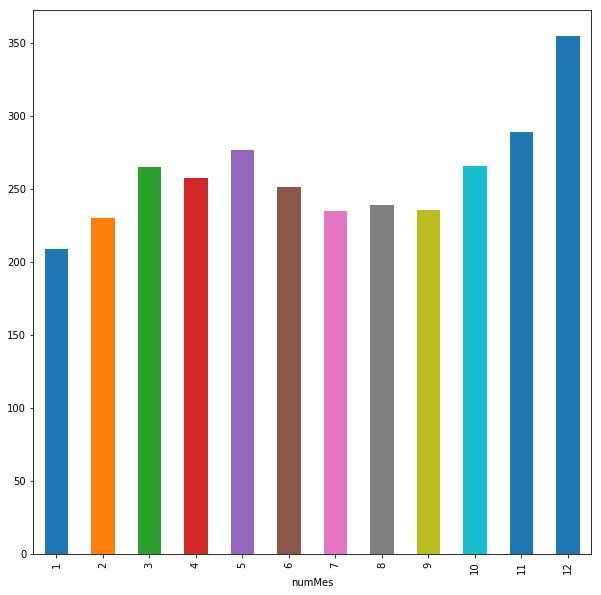

In [35]:
df.groupby('numMes')['vlrLiquido'].sum().sort_index().plot(kind='bar', figsize=(10,10))

## Valor gasto por partido proporcional a quantidade de parlamentares

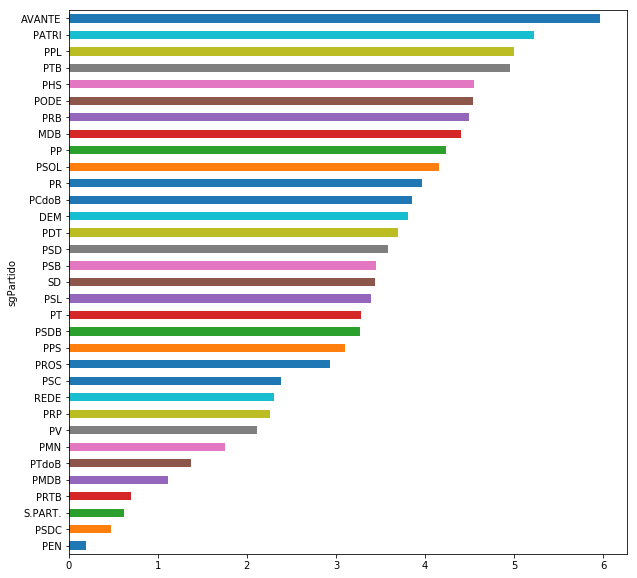

In [36]:
parlamentar_partido = df.groupby('sgPartido').txNomeParlamentar.nunique()
gasto_partido = df.groupby('sgPartido')['vlrLiquido'].sum()
gasto_parlamentar = (gasto_partido / parlamentar_partido)
gasto_parlamentar.sort_values().plot(kind='barh', figsize=(10,10))

## Valor gasto por estado proporcional a quantidade de parlamentares

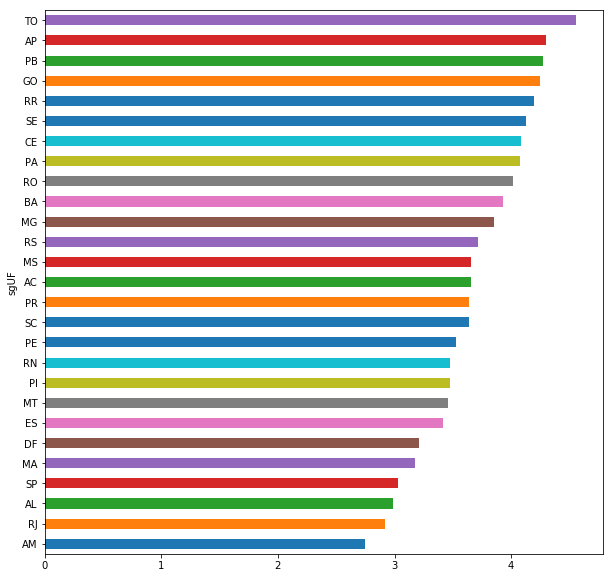

In [37]:
parlamentar_uf = (df.groupby('sgUF')['vlrLiquido'].sum()) / (df.groupby('sgUF').txNomeParlamentar.nunique())
parlamentar_uf.sort_values().plot(kind='barh', figsize=(10,10))

In [38]:
df.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrLiquido,numMes,numAno
3371,AFONSO FLORENCE,BA,PT,PASSAGENS AÉREAS,0.004824,8,2014
5420,AKIRA OTSUBO,MS,PMDB,PASSAGENS AÉREAS,0.004110,8,2014
5421,AKIRA OTSUBO,MS,PMDB,PASSAGENS AÉREAS,0.001929,8,2014
5439,AKIRA OTSUBO,MS,PMDB,PASSAGENS AÉREAS,0.002059,2,2014
5440,AKIRA OTSUBO,MS,PMDB,PASSAGENS AÉREAS,0.001798,2,2014


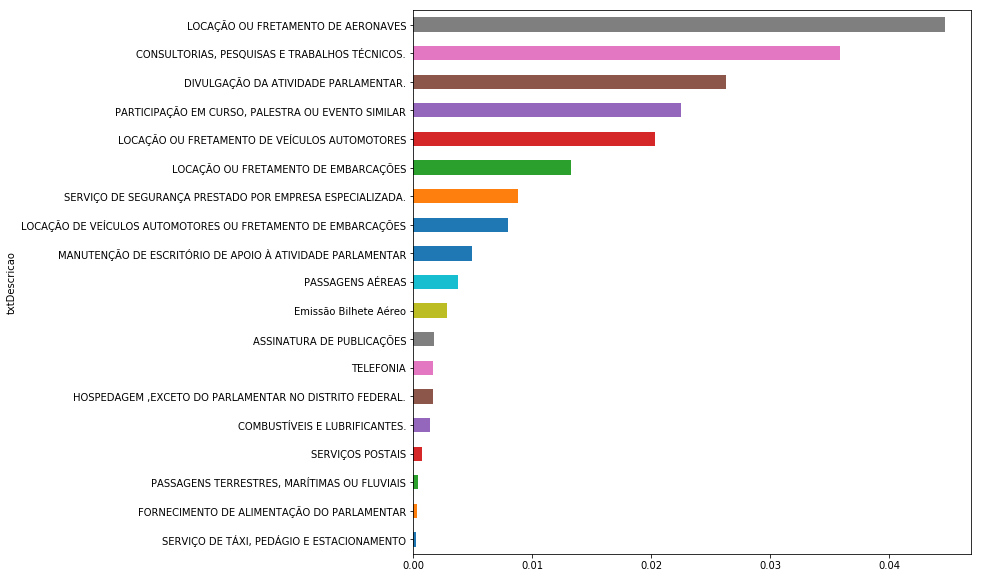

In [39]:
df.groupby(['txtDescricao'])['vlrLiquido'].mean().sort_values().plot(kind='barh', figsize=(10,10))

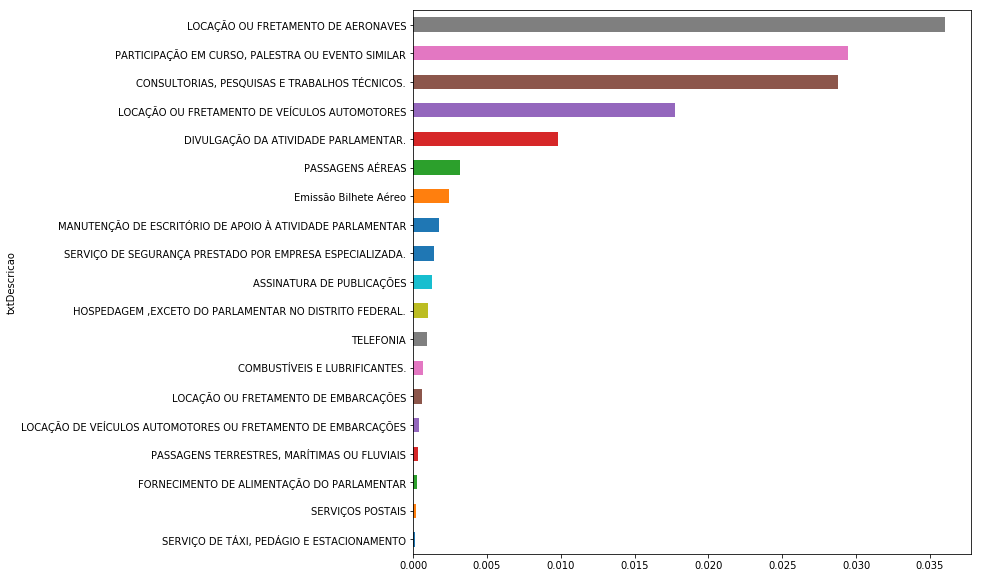

In [40]:
df.groupby(['txtDescricao'])['vlrLiquido'].median().sort_values().plot(kind='barh', figsize=(10,10))

## TESTE CLASSIFICAÇÃO

In [41]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import NuSVC

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discretização

In [42]:
le = LabelEncoder()
df_a = df
df_a = df_a.apply(le.fit_transform)
# df_a = df_a.drop(['txNomeParlamentar'], axis=1)

In [43]:
df_a.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrLiquido,numMes,numAno
3371,13,4,26,13,73289,7,0
5420,17,11,8,13,67423,7,0
5421,17,11,8,13,38503,7,0
5439,17,11,8,13,40687,1,0
5440,17,11,8,13,36202,1,0


## Normalização

## Modelos

In [44]:
target_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [45]:
features = list(df_a)
features.remove('txtDescricao')
x = df_a[features].values
y = df_a['txtDescricao'].values

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.67, stratify=y)
print(len(x_train))
print(len(x_test))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


558648
275155


### K Neighbors

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

0.542923079718704
             precision    recall  f1-score   support

          0       0.35      0.43      0.39       930
          1       0.61      0.78      0.68     74003
          2       0.59      0.59      0.59      3547
          3       0.70      0.72      0.71     11743
          4       0.27      0.24      0.26     11696
          5       0.45      0.49      0.47     30083
          6       0.25      0.11      0.16      6600
          7       0.00      0.00      0.00        42
          8       0.38      0.12      0.18       492
          9       0.25      0.14      0.18        51
         10       0.74      0.74      0.74      7279
         11       0.52      0.46      0.49     27823
         12       0.40      0.08      0.14        24
         13       0.00      0.00      0.00        86
         14       0.39      0.21      0.27      1047
         15       0.63      0.78      0.70      1151
         16       0.58      0.58      0.58     15747
         17       0.55     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 19, does not match size of target_names, 20
  .format(len(labels), len(target_names))


In [48]:
mms = MinMaxScaler()
features = list(df_a)
features.remove('txtDescricao')
x = mms.fit_transform(df_a[features])

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.67, stratify=y)
print(len(x_train))
print(len(x_test))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


558648
275155


In [50]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

0.42626883029565155
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       930
          1       0.60      0.77      0.67     74003
          2       0.00      0.00      0.00      3547
          3       0.44      0.36      0.40     11743
          4       0.00      0.00      0.00     11696
          5       0.30      0.39      0.34     30083
          6       0.00      0.00      0.00      6600
          7       0.00      0.00      0.00        42
          8       0.00      0.00      0.00       492
          9       0.00      0.00      0.00        51
         10       0.31      0.45      0.37      7279
         11       0.28      0.10      0.15     27823
         12       0.00      0.00      0.00        24
         13       0.00      0.00      0.00        86
         14       0.00      0.00      0.00      1047
         15       0.00      0.00      0.00      1151
         16       0.39      0.22      0.28     15747
         17       0.34   

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 19, does not match size of target_names, 20
  .format(len(labels), len(target_names))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [51]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.31100652359579145


In [52]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.3255692246188512


In [53]:
et = ExtraTreesClassifier(n_estimators=100, max_depth=2, random_state=42)
et.fit(x_train, y_train)
y_pred = et.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2695208155403318


In [57]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=1, verbose=1)
gb.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

      Iter       Train Loss   Remaining Time 
         1     1411459.9027           17.52m
         2     1312957.9303           17.32m
         3     1240374.9745           17.22m
         4     1186060.8951           16.91m
         5     1143576.1492           16.69m
         6     1109115.5702           16.56m
         7     1080694.7703           16.53m
         8     1055394.1098           16.31m
         9     1035448.9910           16.06m
        10     1018667.8963           15.81m
        20      931657.2786           14.29m
        30      898511.1867           12.55m
        40      882982.8520           10.76m
        50      874178.5441            8.88m
        60      868955.9402            7.01m
        70      864764.0384            5.22m
        80      860811.0813            3.47m
        90 6121888841553020928.0000            1.73m
       100 6121888841553017856.0000            0.00s
0.3255692246188512
